In [1]:
%load_ext autoreload
%autoreload 2

In [11]:
# %matplotlib notebook
%matplotlib inline
import os

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from utils.mri_viewer import MRIViewer, MRIViewerSlice
from utils.data_utils import im_path_to_arr, resize_data_to_brats_size


In [3]:
path = "/local-scratch/marcthib_scratch/miccai-radiology/train"
patients = os.listdir(path)
patient = patients[6]

In [4]:
modalities = os.listdir(os.path.join(path, patient))
print(modalities)
modalities = ["T1C.nii", "t1c_proc.nii", "FLAIR.nii", "flair_proc.nii"]
modalities_path = [os.path.join(path, patient, m) for m in modalities]

['T2.nii', 'FLAIR.nii', 'T1C.nii', 'T1.nii', 't1c_proc.nii', 'flair_proc.nii']


In [5]:
#modalities_images = [im_path_to_arr(m) for m in modalities_path]
modalities_images = [resize_data_to_brats_size(im_path_to_arr(m)) for m in modalities_path]
modalities_images = modalities_images + [] * (4 - len(modalities_images))
# modalities = modalities + [] * (4 - len(modalities))
modalities_titles = {"title" + str(i+1): m for i, m in enumerate(modalities)}

In [6]:
modalities

['T1C.nii', 't1c_proc.nii', 'FLAIR.nii', 'flair_proc.nii']

In [7]:
modalities_images[3][np.isnan(modalities_images[3])] = 0.

In [8]:
print([modalities_images[i].shape for i in range(4)])

[(192, 256, 256), (170, 256, 256), (144, 256, 256), (170, 256, 256)]


<IPython.core.display.Javascript object>


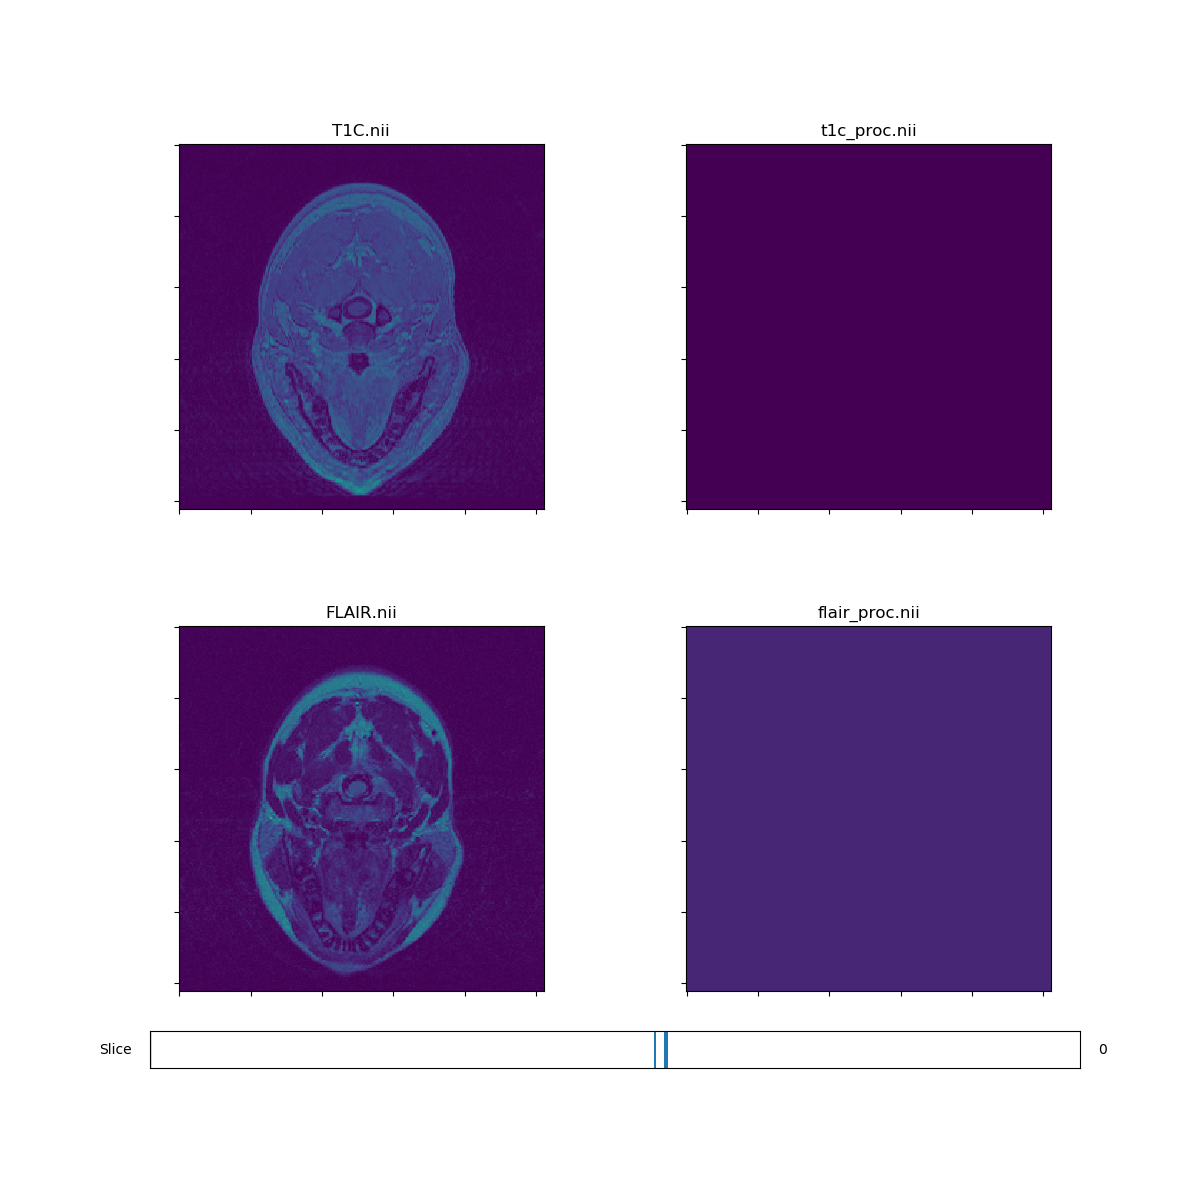

In [22]:
MRIViewer(*modalities_images, cmap=None, **modalities_titles)

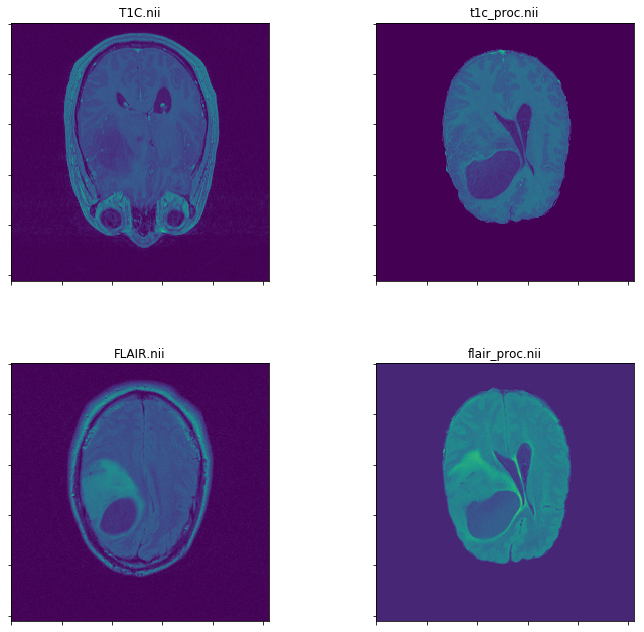

In [12]:
MRIViewerSlice(*modalities_images, cmap=None, **modalities_titles, sl=100)